<a href="https://colab.research.google.com/github/AndreaMaldera/Affidabilit-creditizia/blob/main/Affidabilit%C3%A0_Creditizia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("credit_scoring.csv")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1


In [ ]:
df.shape

(338427, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338427 entries, 0 to 338426
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   338427 non-null  int64  
 1   CODE_GENDER          338427 non-null  object 
 2   FLAG_OWN_CAR         338427 non-null  object 
 3   FLAG_OWN_REALTY      338427 non-null  object 
 4   CNT_CHILDREN         338427 non-null  int64  
 5   AMT_INCOME_TOTAL     338427 non-null  float64
 6   NAME_INCOME_TYPE     338427 non-null  object 
 7   NAME_EDUCATION_TYPE  338427 non-null  object 
 8   NAME_FAMILY_STATUS   338426 non-null  object 
 9   NAME_HOUSING_TYPE    338426 non-null  object 
 10  DAYS_BIRTH           338426 non-null  float64
 11  DAYS_EMPLOYED        338426 non-null  float64
 12  FLAG_MOBIL           338426 non-null  float64
 13  FLAG_WORK_PHONE      338426 non-null  float64
 14  FLAG_PHONE           338426 non-null  float64
 15  FLAG_EMAIL       

In [ ]:
df = df.drop("ID", axis=1)

In [ ]:
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,TARGET
count,338427.000000,3.384270e+05,338426.000000,338426.000000,338426.0,338426.000000,338426.000000,338426.000000,338426.000000,338427.000000
mean,0.428934,1.876543e+05,-15998.249644,60238.497163,1.0,0.211379,0.293302,0.105181,2.197228,0.087824
std,0.727990,1.106747e+05,4180.240053,138499.153147,0.0,0.408287,0.455276,0.306787,0.899570,0.283039
min,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19482.000000,-3116.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.620000e+05,-15622.000000,-1485.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12524.000000,-380.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,1.000000


In [ ]:
df.isna().sum()

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,1
NAME_HOUSING_TYPE,1
DAYS_BIRTH,1


###E' stata creata una nuova categoria "Retirees" della feature "OCCUPATION_TYPE" poichè ha un'elevata presenza di valori nulli.

In [ ]:
ratio = df["OCCUPATION_TYPE"].isna().sum()/df.shape[0]*100
print(f"Percentuale valori nulli rispetto al dataset: {ratio:.2f}%")

Percentuale valori nulli rispetto al dataset: 30.54%


In [ ]:
df["OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].fillna("Retirees")
df["OCCUPATION_TYPE"].isna().sum()

0

##Imputazione dei valori mancanti: variabili numeriche

In [ ]:
col = ["CNT_FAM_MEMBERS", "DAYS_EMPLOYED", "DAYS_BIRTH"]
replace_with = df[col].mean()
df[col] = df[col].fillna(replace_with)
df[col].isna().sum().sum()

0

##Imputazione valori mancanti: variabili categoriche

In [ ]:
col = ["NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"]
replace_with = df[col].mode().iloc[0]
df[col] = df[col].fillna(replace_with)
df[col].isna().sum().sum()

0

In [ ]:
duplicates = df.duplicated().sum()
print(f"Numero di righe duplicate: {duplicates/df.shape[0]*100}%")

Numero di righe duplicate: 77.76270805816321%


In [ ]:
df = df.drop_duplicates()
df.shape

(75257, 18)

In [ ]:
class_counts = df["TARGET"].value_counts()
ratio = class_counts[1]/class_counts[0]
print(f"Rapporto tra la classe positiva e la classe negativa: {ratio*100:.2f}%")

Rapporto tra la classe positiva e la classe negativa: 10.86%


##Analisi grafica variabili categoriche

In [ ]:
def countplot(column, data, title=None, xlabel=None, ylabel="Count"):

  plt.figure(figsize=(10,8))
  sns.set_theme(style="whitegrid")
  sns.countplot(x=column, data=data)

  if title is None:
    title= f"Boxplot di {column}"
  if xlabel is None:
    xlabel=column

  plt.title(title, fontsize=16)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.xticks(rotation=45)

  total = df.shape[0]
  counts = df[column].value_counts()
  percentages = round(counts/total*100,2)

  print(f"Distribuzione di {column}:")
  for category, count, percentage in zip(counts.index, counts.values, percentages):
    print(f"{category}: {count} ({percentage}%)")

  plt.show()

Distribuzione di TARGET:
0: 67887 (90.21%)
1: 7370 (9.79%)


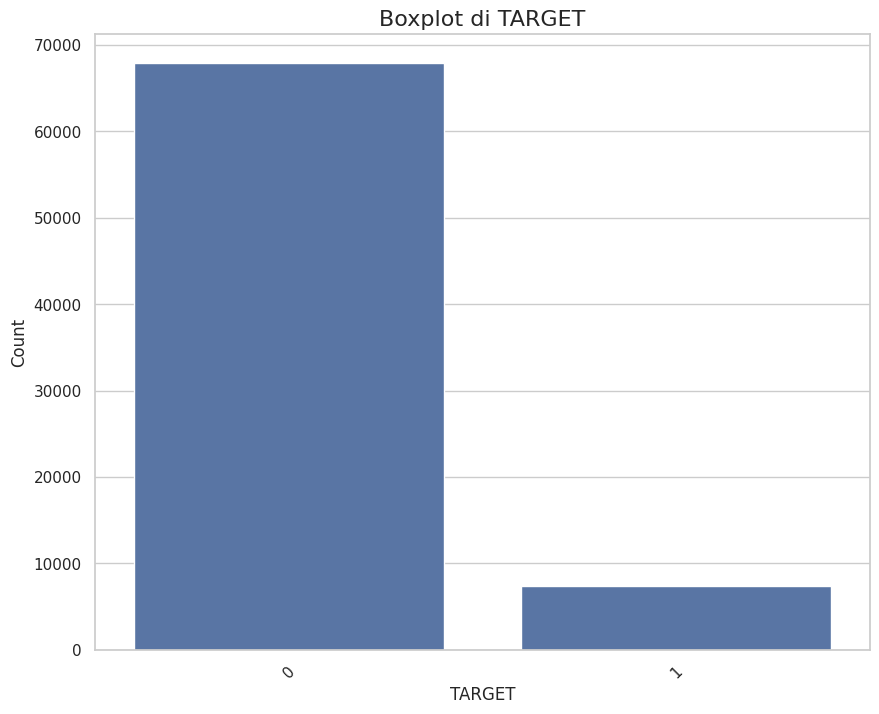

In [ ]:
countplot("TARGET", df)

Distribuzione di CODE_GENDER:
F: 49006 (65.12%)
M: 26251 (34.88%)


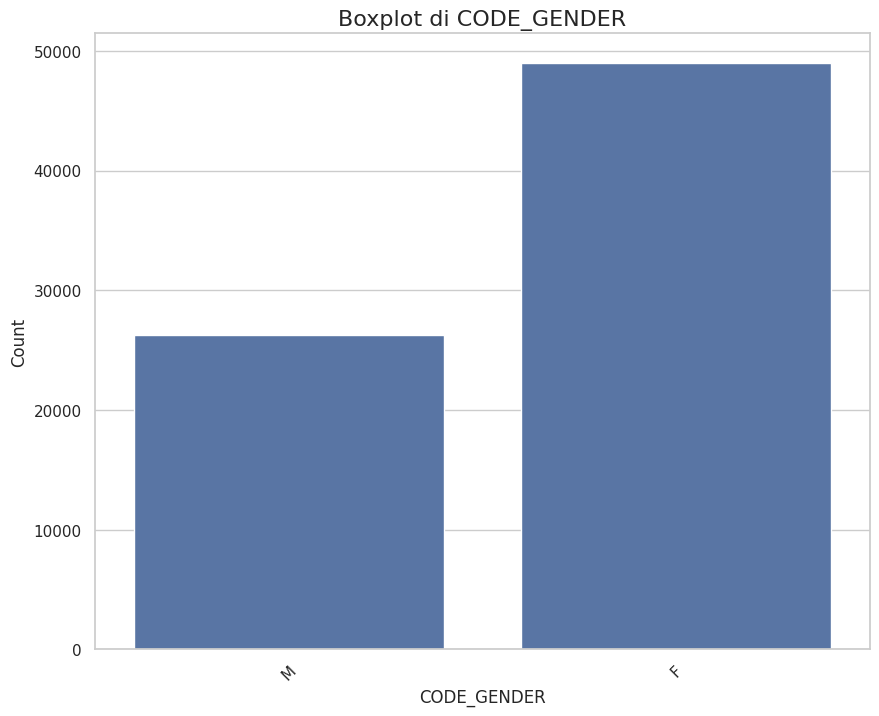

In [ ]:
countplot("CODE_GENDER", df)

Distribuzione di FLAG_OWN_CAR:
N: 47678 (63.35%)
Y: 27579 (36.65%)


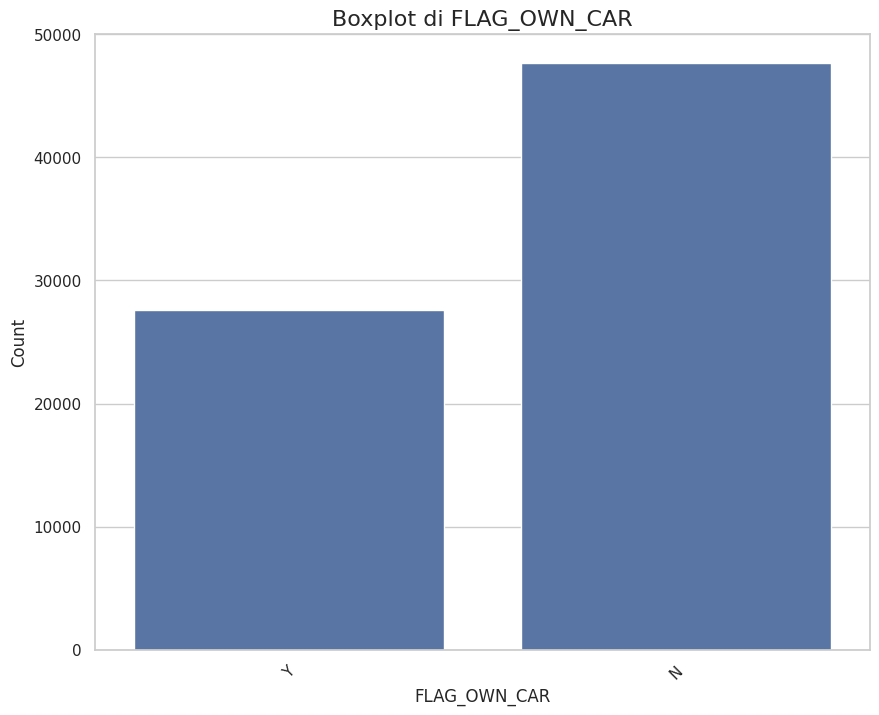

In [ ]:
countplot("FLAG_OWN_CAR", df)

Distribuzione di FLAG_OWN_REALTY:
Y: 51376 (68.27%)
N: 23881 (31.73%)


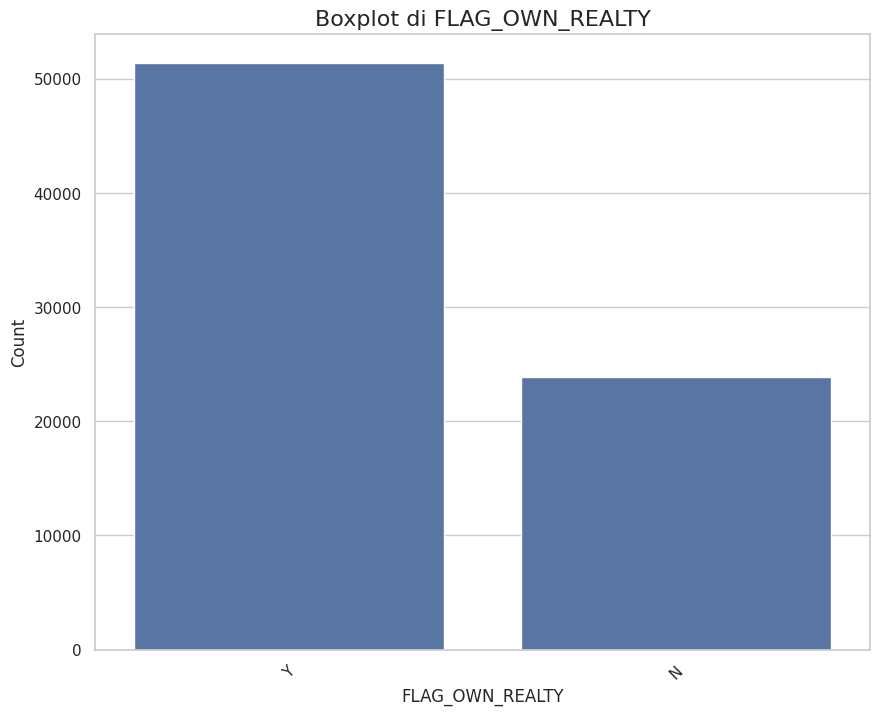

In [ ]:
countplot("FLAG_OWN_REALTY", df)

Distribuzione di NAME_INCOME_TYPE:
Working: 39179 (52.06%)
Commercial associate: 18067 (24.01%)
Pensioner: 12115 (16.1%)
State servant: 5889 (7.83%)
Student: 7 (0.01%)


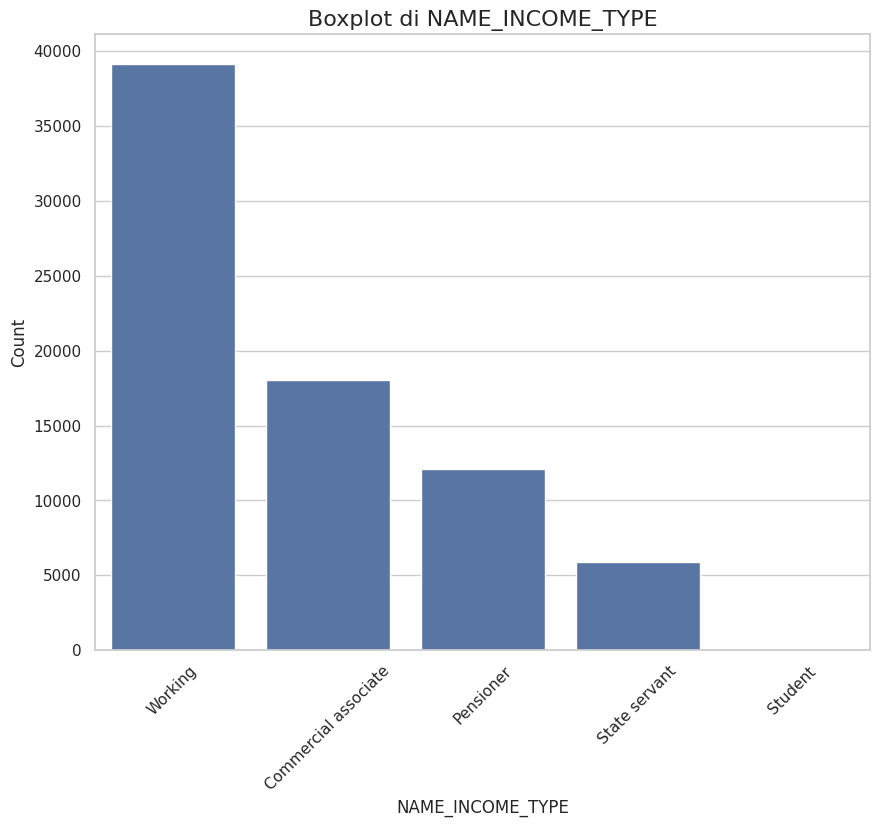

In [ ]:
countplot("NAME_INCOME_TYPE", df)

Distribuzione di NAME_INCOME_TYPE:
Working: 39179 (52.06%)
Commercial associate: 18067 (24.01%)
Pensioner: 12115 (16.1%)
Other: 5896 (7.83%)


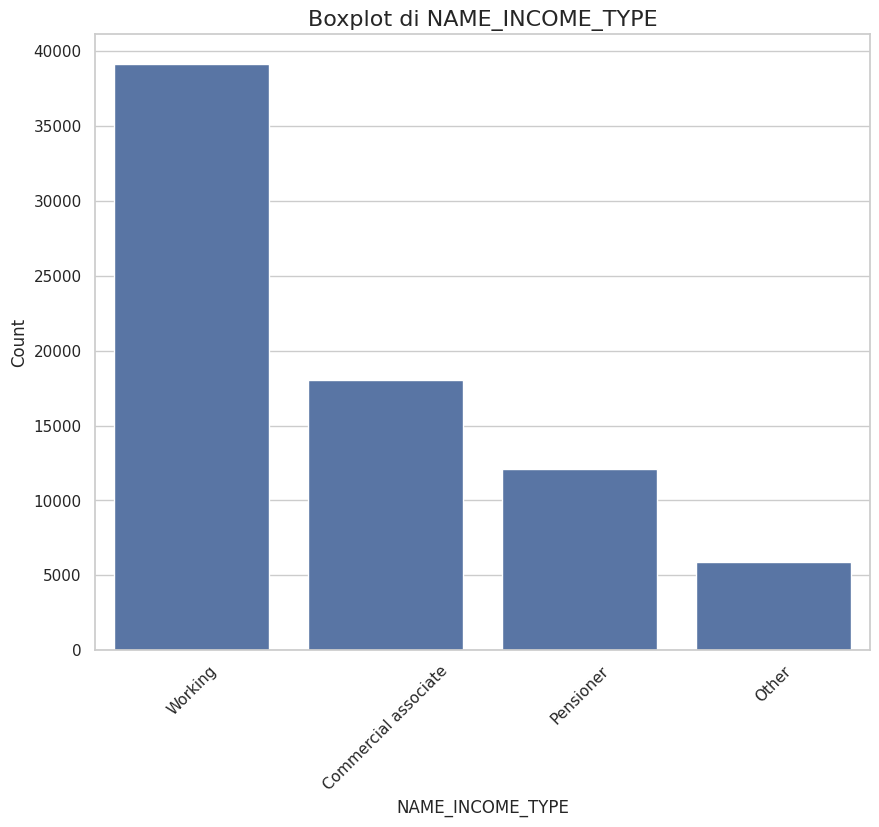

In [ ]:
percentages = df["NAME_INCOME_TYPE"].value_counts(normalize=True)*100
low_percentages = percentages[percentages < 10].index
df["NAME_INCOME_TYPE"] = df["NAME_INCOME_TYPE"].replace(low_percentages, "Other")
countplot("NAME_INCOME_TYPE", df)

Distribuzione di OCCUPATION_TYPE:
Retirees: 22126 (29.4%)
Laborers: 13955 (18.54%)
Sales staff: 7398 (9.83%)
Core staff: 6925 (9.2%)
Managers: 6017 (8.0%)
Drivers: 4964 (6.6%)
High skill tech staff: 2911 (3.87%)
Accountants: 2632 (3.5%)
Medicine staff: 2177 (2.89%)
Security staff: 1491 (1.98%)
Cooking staff: 1433 (1.9%)
Cleaning staff: 1031 (1.37%)
Private service staff: 646 (0.86%)
Low-skill Laborers: 457 (0.61%)
Secretaries: 338 (0.45%)
Waiters/barmen staff: 309 (0.41%)
Realty agents: 199 (0.26%)
HR staff: 143 (0.19%)
IT staff: 105 (0.14%)


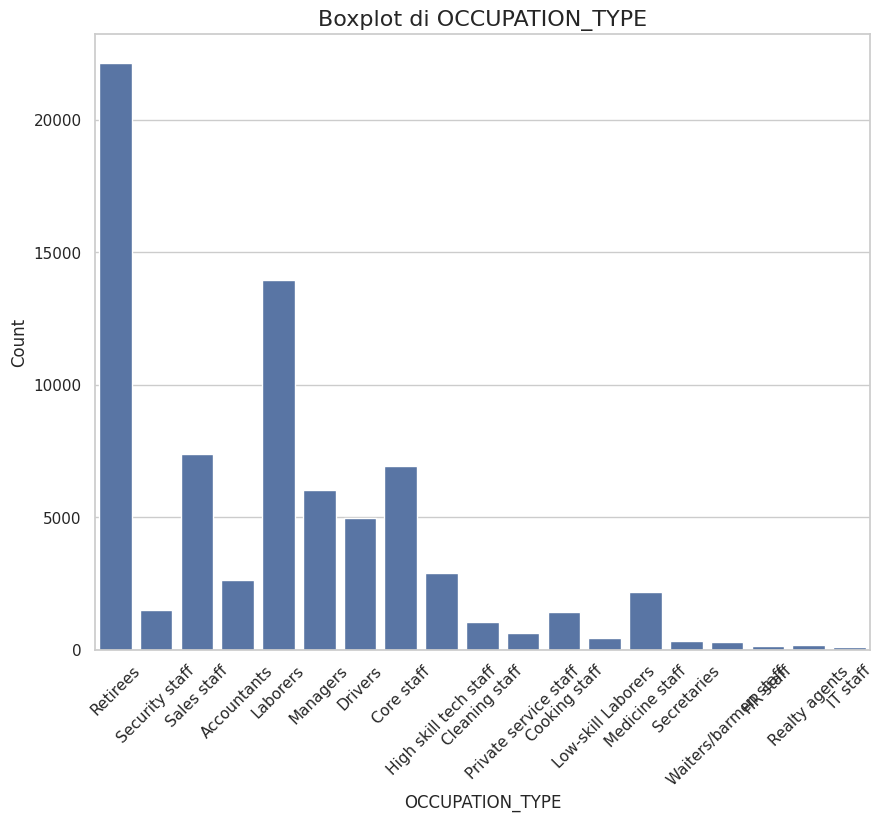

In [ ]:
countplot("OCCUPATION_TYPE", df)

Distribuzione di OCCUPATION_TYPE:
Other: 39176 (52.06%)
Retirees: 22126 (29.4%)
Laborers: 13955 (18.54%)


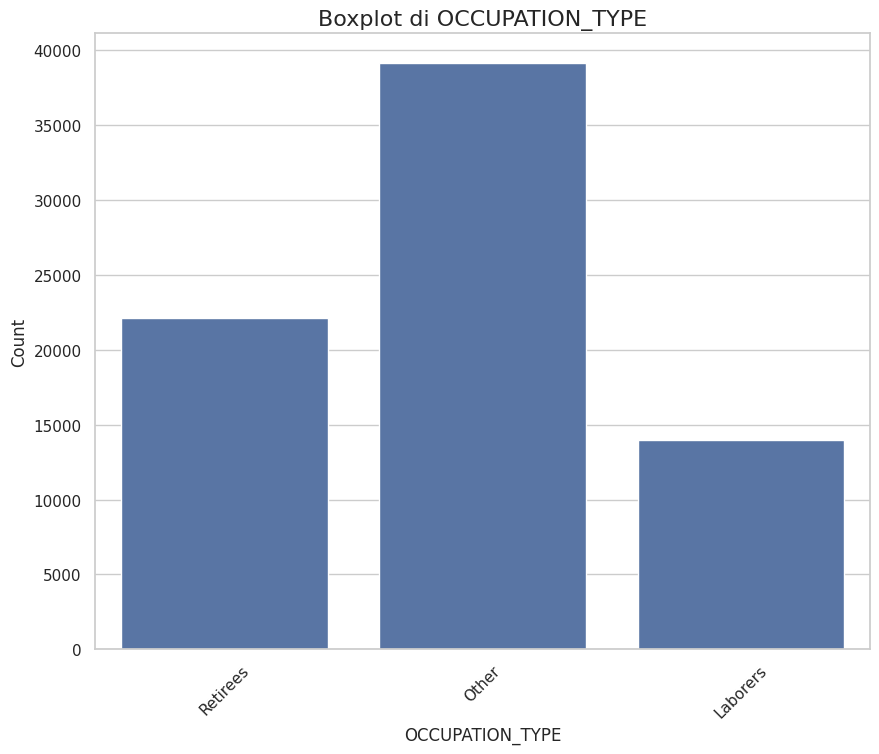

In [ ]:
percentages = df["OCCUPATION_TYPE"].value_counts(normalize=True)*100
low_percentages = percentages[percentages < 10].index
df["OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].replace(low_percentages, "Other")
countplot("OCCUPATION_TYPE", df)

Distribuzione di NAME_EDUCATION_TYPE:
Secondary / secondary special: 52714 (70.05%)
Higher education: 19187 (25.5%)
Incomplete higher: 2526 (3.36%)
Lower secondary: 782 (1.04%)
Academic degree: 47 (0.06%)
Secondary / se: 1 (0.0%)


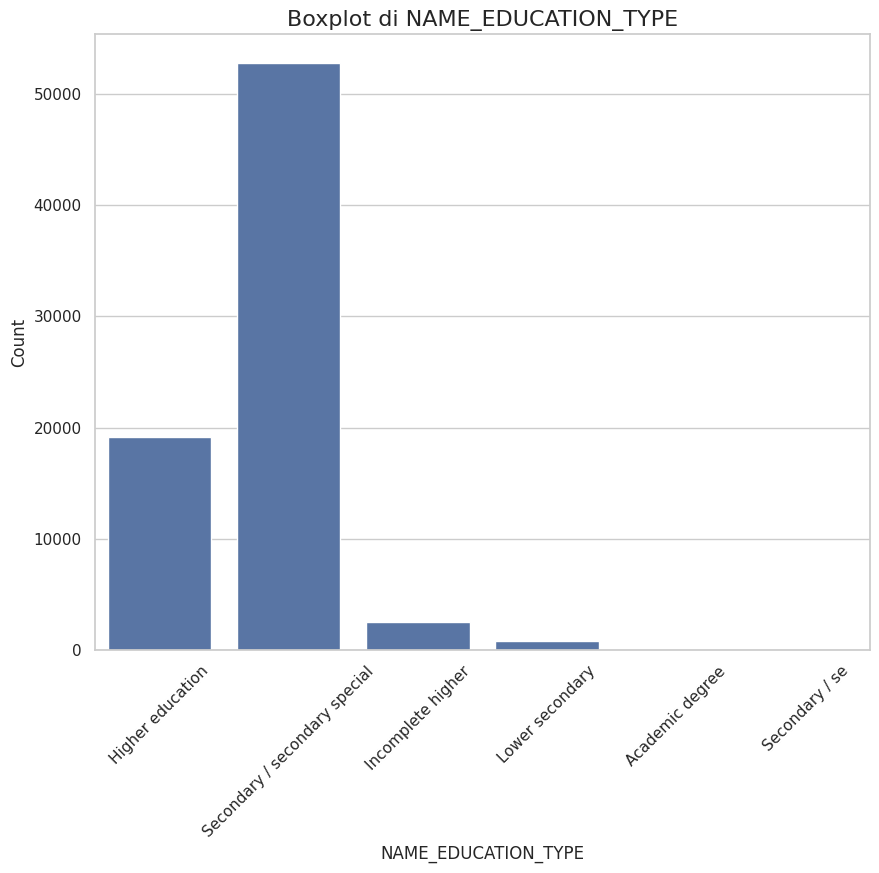

In [ ]:
countplot("NAME_EDUCATION_TYPE", df)

Distribuzione di NAME_EDUCATION_TYPE:
Secondary / secondary special: 52714 (70.05%)
Higher education: 19187 (25.5%)
Other: 3356 (4.46%)


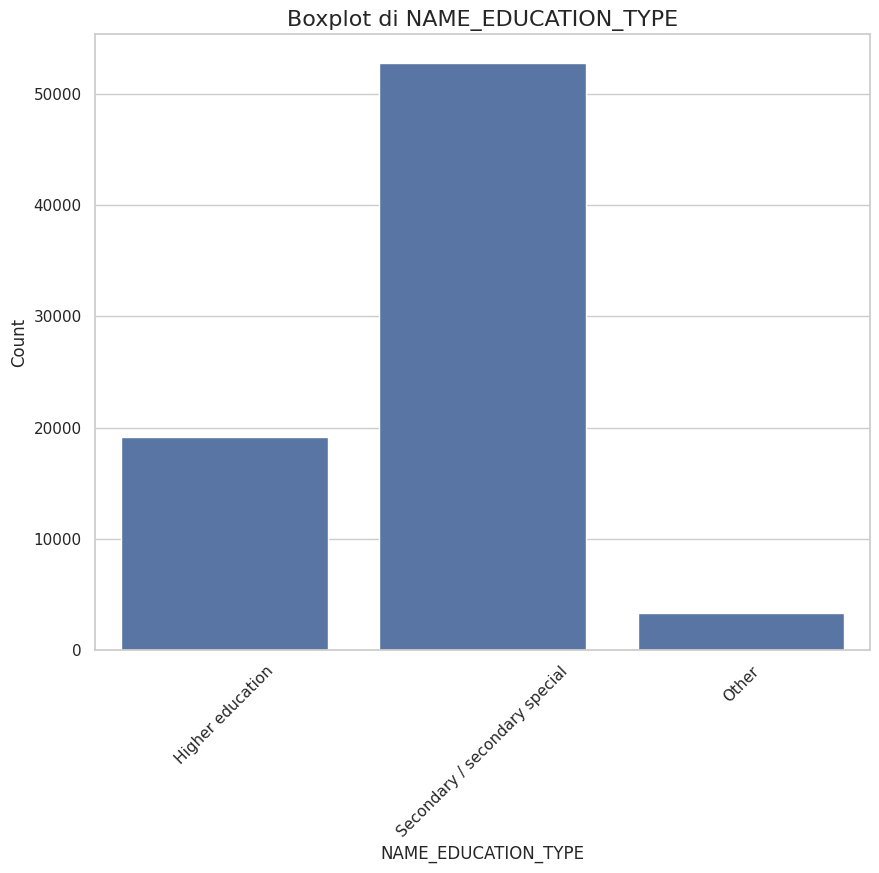

In [ ]:
percentages = df["NAME_EDUCATION_TYPE"].value_counts(normalize=True)*100
low_percentages = percentages[percentages < 10].index
df["NAME_EDUCATION_TYPE"] = df["NAME_EDUCATION_TYPE"].replace(low_percentages, "Other")
countplot("NAME_EDUCATION_TYPE", df)

Distribuzione di NAME_FAMILY_STATUS:
Married: 50240 (66.76%)
Single / not married: 10214 (13.57%)
Civil marriage: 6715 (8.92%)
Separated: 4703 (6.25%)
Widow: 3385 (4.5%)


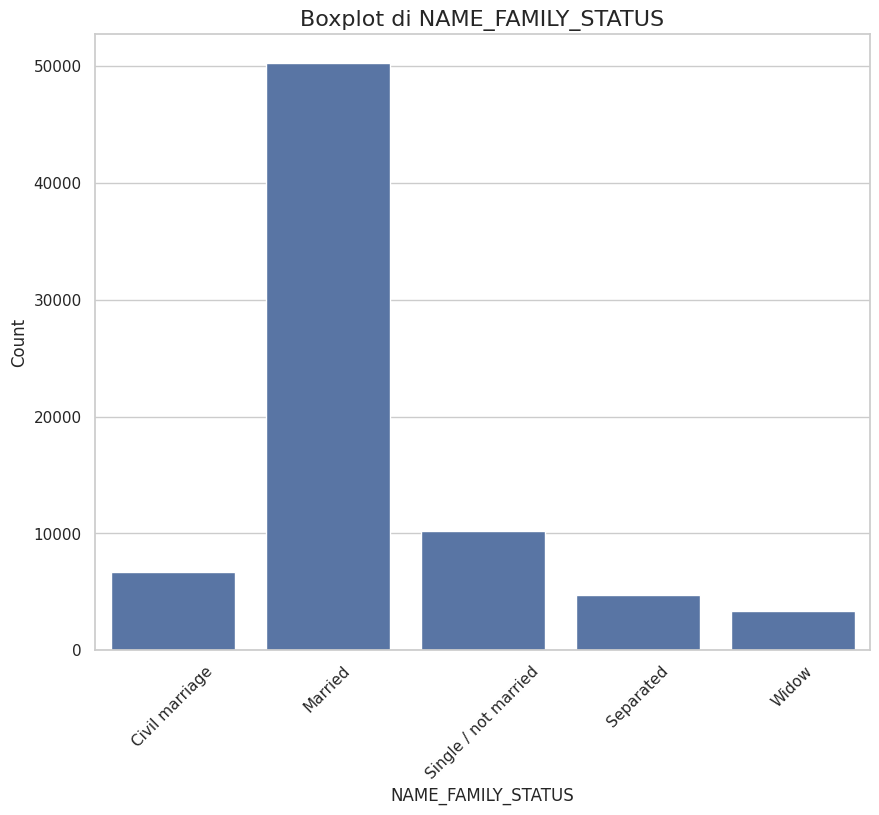

In [ ]:
countplot("NAME_FAMILY_STATUS", df)

Distribuzione di NAME_FAMILY_STATUS:
Married: 50240 (66.76%)
Other: 14803 (19.67%)
Single / not married: 10214 (13.57%)


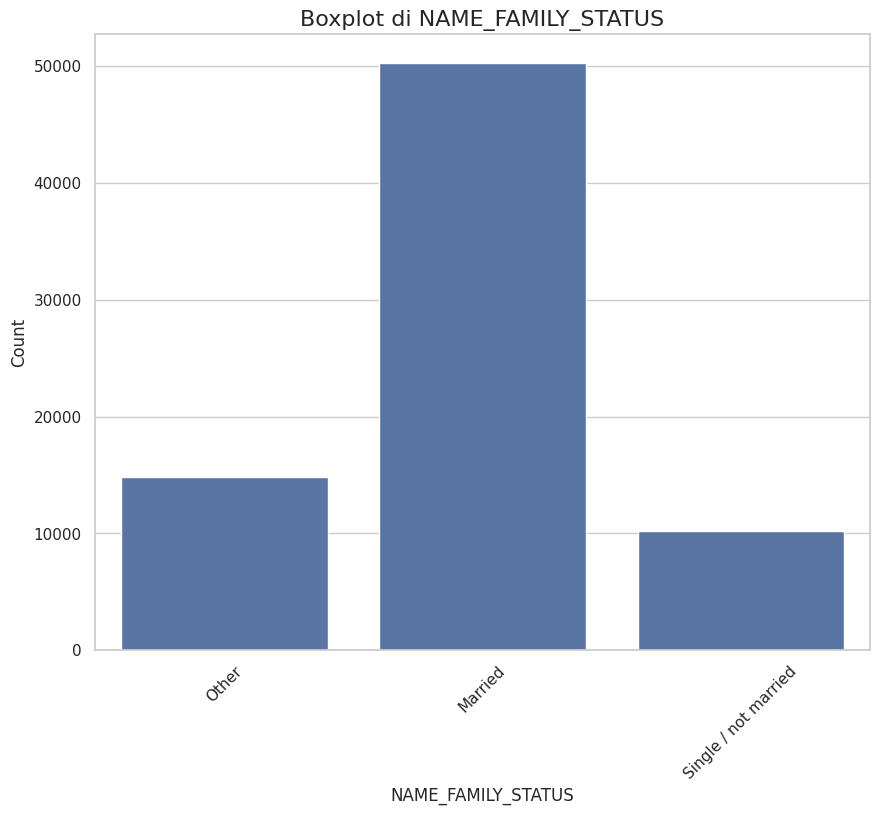

In [ ]:
percentages = df["NAME_FAMILY_STATUS"].value_counts(normalize=True)*100
low_percentages = percentages[percentages < 10].index
df["NAME_FAMILY_STATUS"] = df["NAME_FAMILY_STATUS"].replace(low_percentages, "Other")
countplot("NAME_FAMILY_STATUS", df)

Distribuzione di NAME_HOUSING_TYPE:
House / apartment: 67361 (89.51%)
With parents: 3273 (4.35%)
Municipal apartment: 2642 (3.51%)
Rented apartment: 1077 (1.43%)
Office apartment: 665 (0.88%)
Co-op apartment: 239 (0.32%)


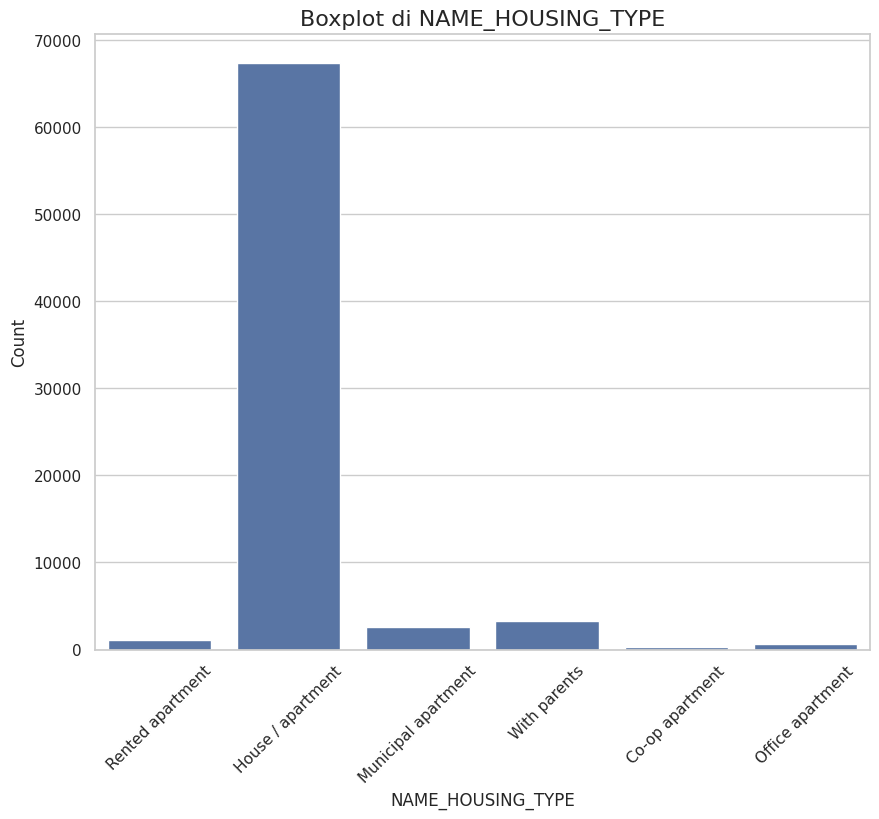

In [ ]:
countplot("NAME_HOUSING_TYPE", df)

Distribuzione di NAME_HOUSING_TYPE:
House / apartment: 67361 (89.51%)
Other: 7896 (10.49%)


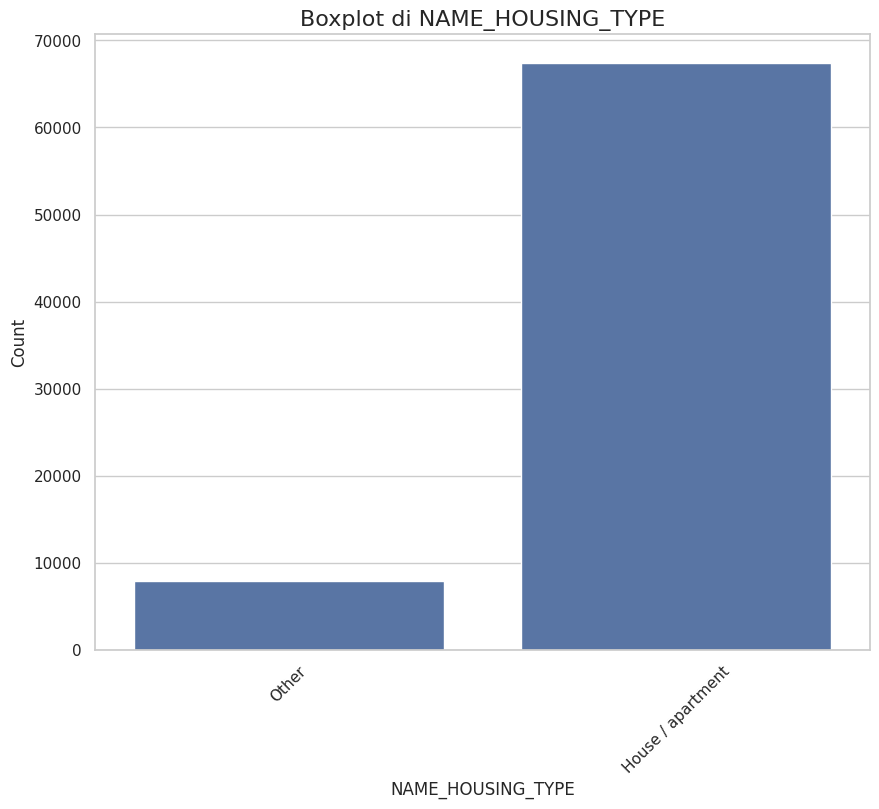

In [ ]:
percentages = df["NAME_HOUSING_TYPE"].value_counts(normalize=True)*100
low_percentages = percentages[percentages < 10].index
df["NAME_HOUSING_TYPE"] = df["NAME_HOUSING_TYPE"].replace(low_percentages, "Other")
countplot("NAME_HOUSING_TYPE", df)

Distribuzione di CNT_CHILDREN:
0: 53126 (70.59%)
1: 14689 (19.52%)
2: 6427 (8.54%)
3: 897 (1.19%)
4: 86 (0.11%)
5: 24 (0.03%)
14: 2 (0.0%)
6: 2 (0.0%)
19: 1 (0.0%)
7: 1 (0.0%)
9: 1 (0.0%)
12: 1 (0.0%)


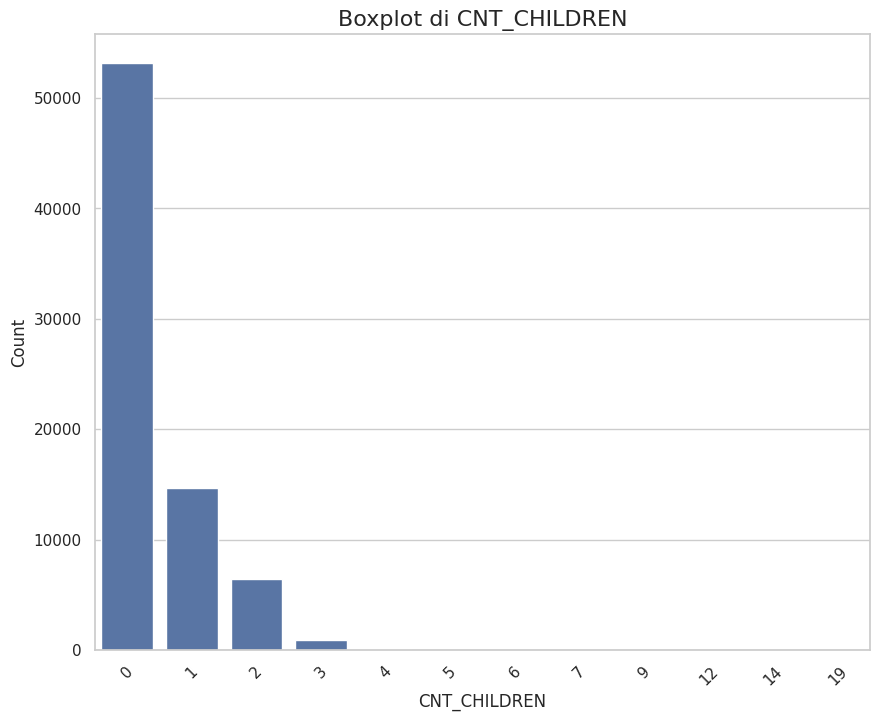

In [ ]:
countplot("CNT_CHILDREN", df)

Distribuzione di CNT_CHILDREN:
0: 53126 (70.59%)
1: 14689 (19.52%)
>1: 7442 (9.89%)


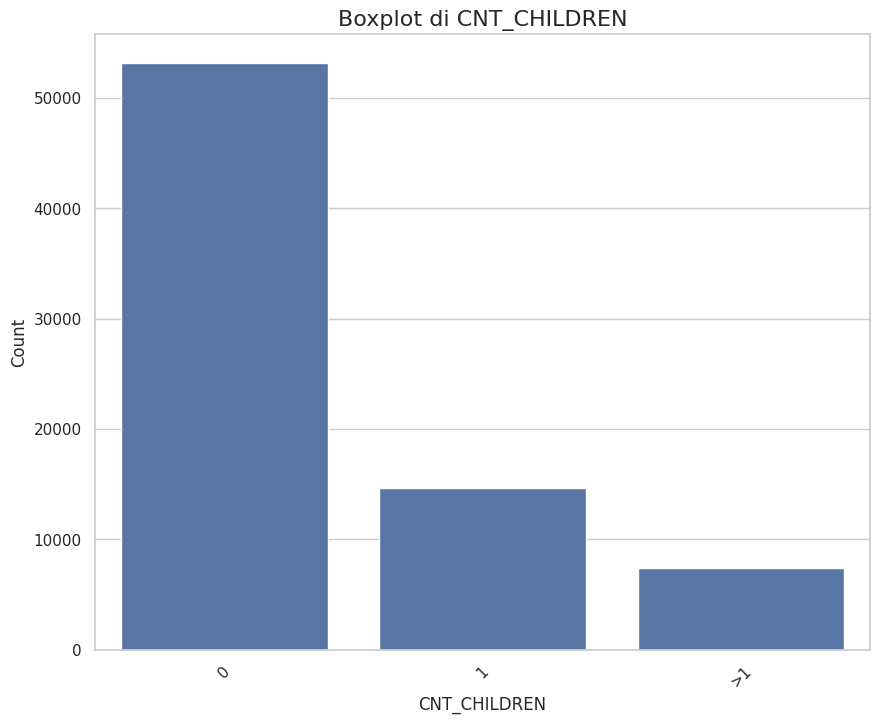

In [ ]:
df["CNT_CHILDREN"] = df["CNT_CHILDREN"].apply(lambda x: "0" if x == 0 else ("1" if x == 1 else ">1"))
countplot("CNT_CHILDREN", df)

Distribuzione di CNT_FAM_MEMBERS:
2.0: 40253 (53.49%)
1.0: 15306 (20.34%)
3.0: 12748 (16.94%)
4.0: 5995 (7.97%)
5.0: 840 (1.12%)
6.0: 83 (0.11%)
7.0: 23 (0.03%)
15.0: 2 (0.0%)
8.0: 2 (0.0%)
20.0: 1 (0.0%)
9.0: 1 (0.0%)
11.0: 1 (0.0%)
14.0: 1 (0.0%)
2.1972277543687544: 1 (0.0%)


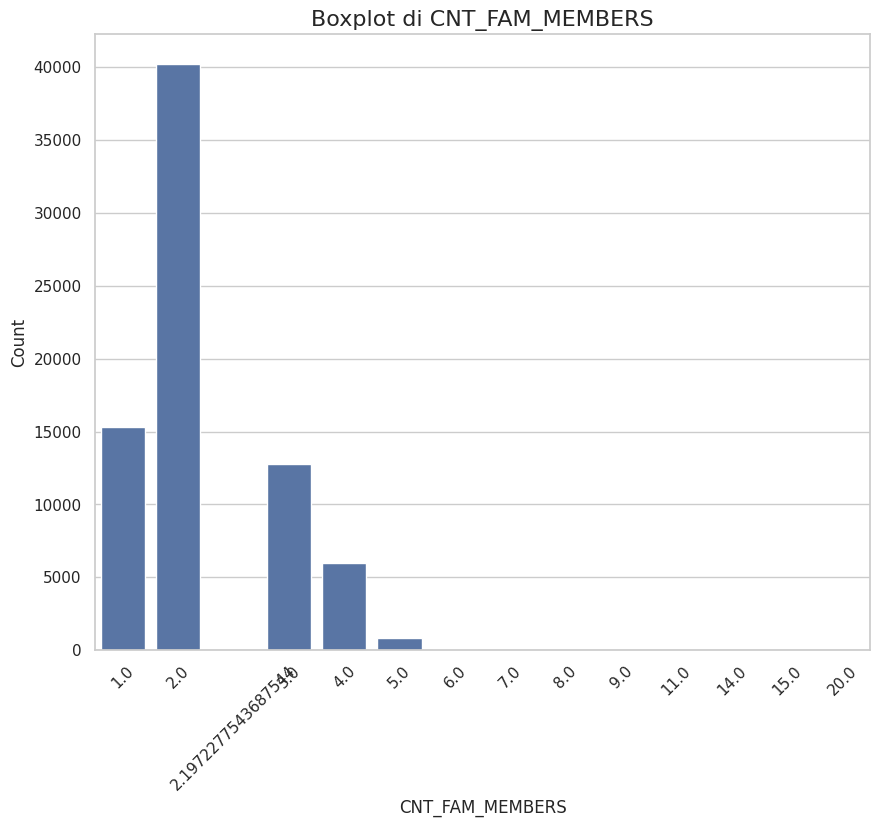

In [ ]:
countplot("CNT_FAM_MEMBERS", df)

La variabile CNT_FAM_MEMBERS è stata convertita in interi, trasformando il valore anomalo 2.197... in 2.

Distribuzione di CNT_FAM_MEMBERS:
2: 40254 (53.49%)
1: 15306 (20.34%)
3: 12748 (16.94%)
>3: 6949 (9.23%)


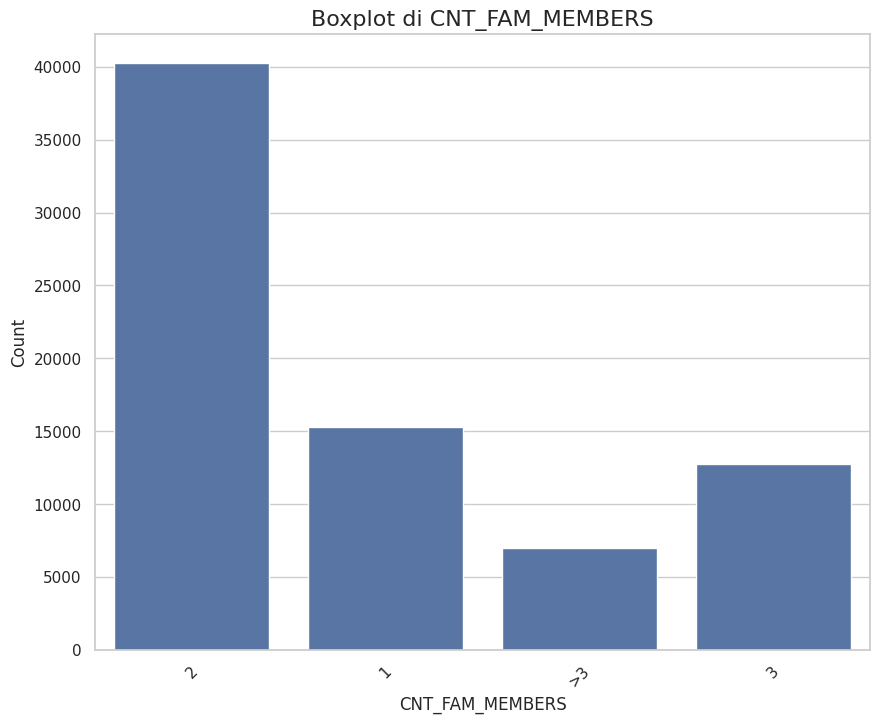

In [ ]:
df["CNT_FAM_MEMBERS"] = df["CNT_FAM_MEMBERS"].astype(int)
df["CNT_FAM_MEMBERS"] = df["CNT_FAM_MEMBERS"].apply(lambda x: "1" if x == 1
                                                            else ("2" if x == 2
                                                                  else ("3" if x == 3
                                                                        else ">3")))

countplot("CNT_FAM_MEMBERS", df)

Distribuzione di FLAG_WORK_PHONE:
0.0: 59681 (79.3%)
1.0: 15576 (20.7%)


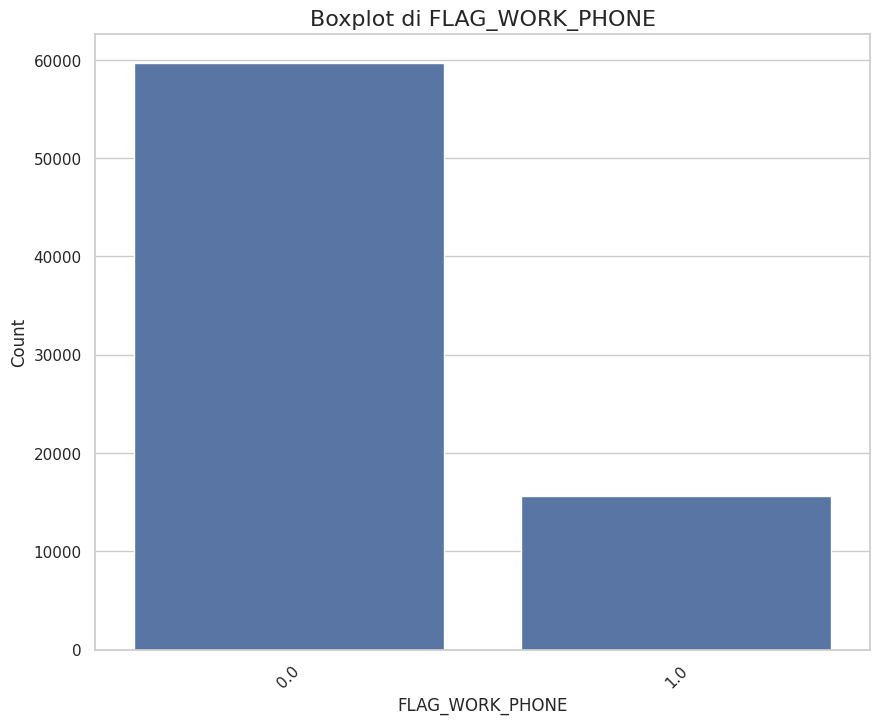

In [ ]:
countplot("FLAG_WORK_PHONE", df)

Distribuzione di FLAG_PHONE:
0.0: 53992 (71.74%)
1.0: 21265 (28.26%)


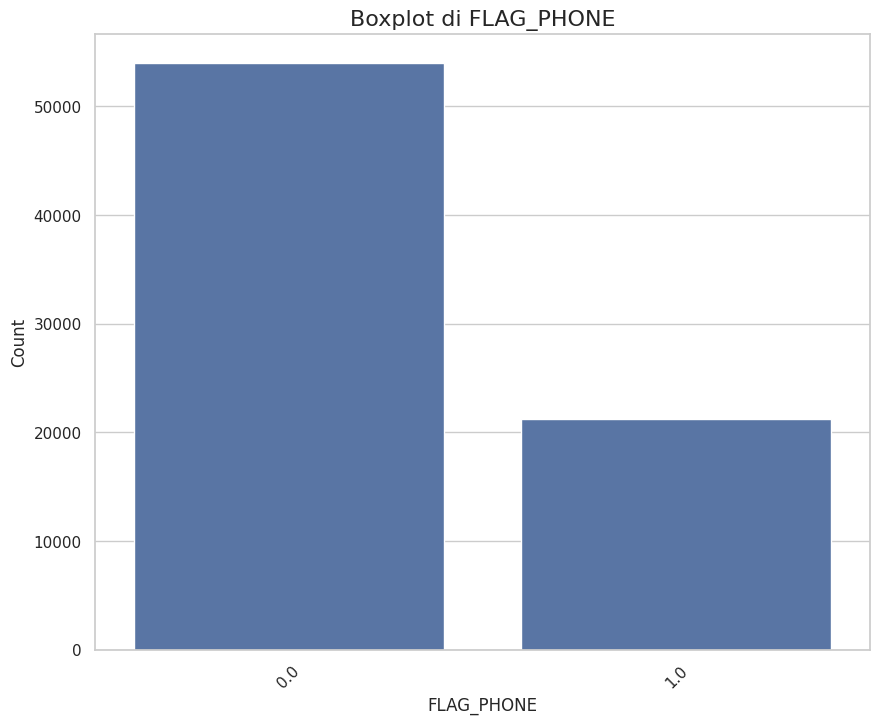

In [ ]:
countplot("FLAG_PHONE", df)

Distribuzione di FLAG_EMAIL:
0.0: 67784 (90.07%)
1.0: 7473 (9.93%)


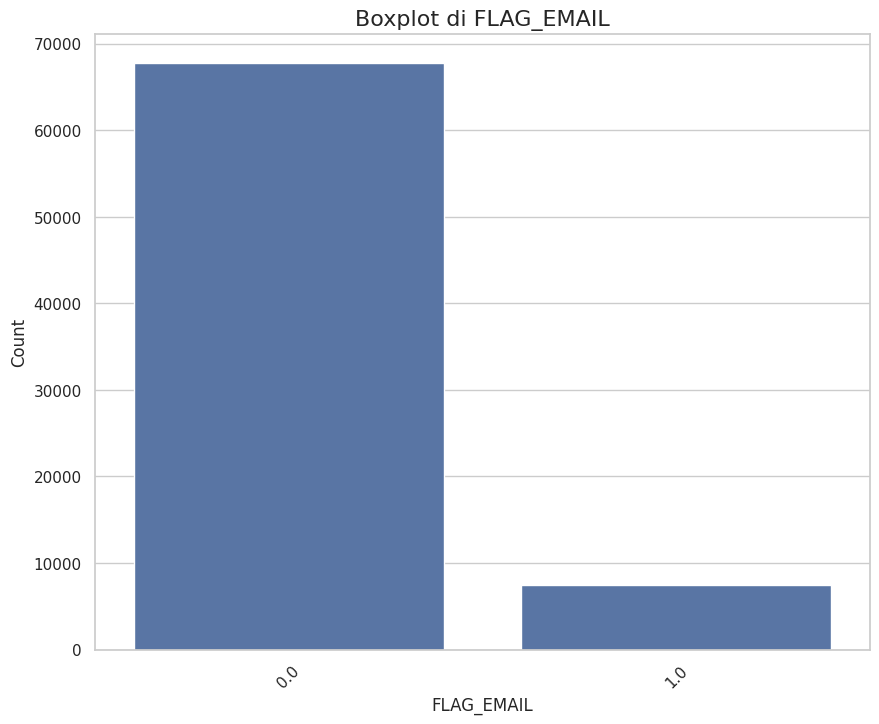

In [ ]:
countplot("FLAG_EMAIL", df)

Sono state analizzate le variabili per identificare le categorie con una frequenza inferiore ad una determinata soglia rispetto al totale. Queste categorie meno rappresentate sono state raggruppate in una nuova classe denominata "Other".

In [ ]:
df["FLAG_MOBIL"].value_counts()

,count
FLAG_MOBIL,
1.0,75257


La variabile "FLAG_MOBIL" è stata eliminata dal dataset poiché presenta lo stesso valore per tutti i record. Essendo una variabile costante, non aggiunge alcuna informazione utile ai fini dell'analisi.

In [ ]:
df = df.drop("FLAG_MOBIL", axis=1)
df.shape

(75257, 17)

##Analisi grafica variabili continue

In [ ]:
def boxplot(column, data, title=None, ylabel=None):

    plt.figure(figsize=(8, 6))
    sns.set_theme(style="whitegrid")
    sns.boxplot(y=data[column])

    if title is None:
        title = f"Boxplot di {column}"
    if ylabel is None:
        ylabel = column

    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

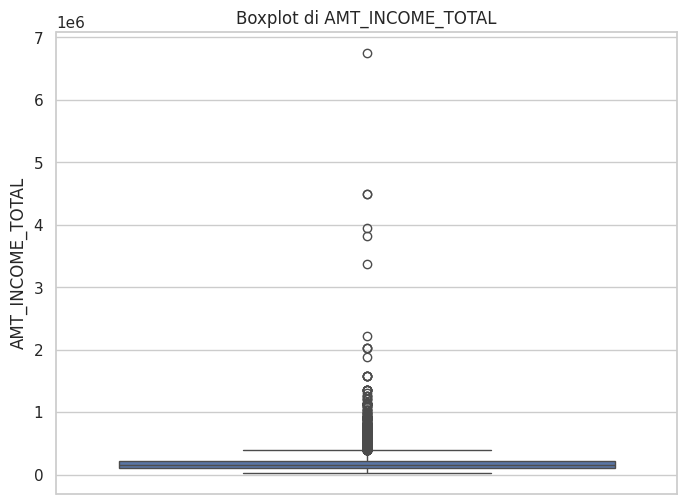

In [ ]:
boxplot("AMT_INCOME_TOTAL", df)

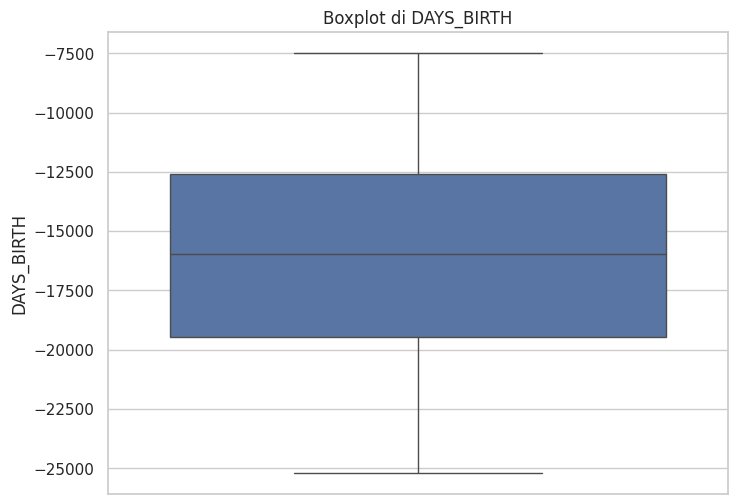

In [ ]:
boxplot("DAYS_BIRTH", df)

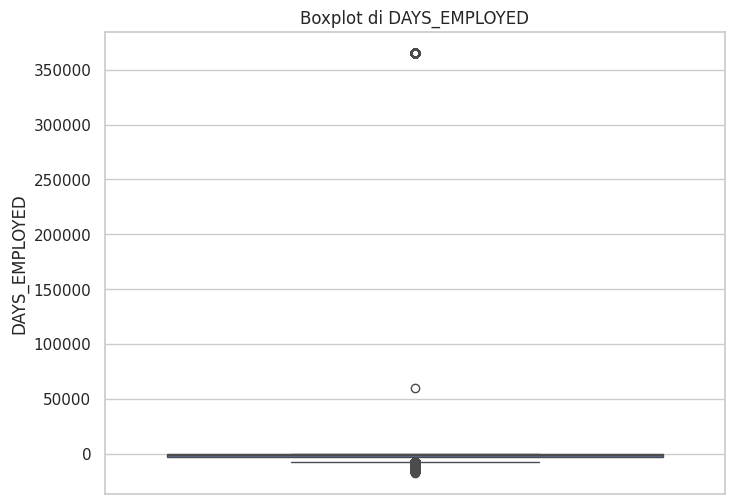

In [ ]:
boxplot("DAYS_EMPLOYED", df)

Sono stati rilevati valori anomali (outliers) nella variabile "DAYS_EMPLOYED". Per mitigare l'effetto di questi valori estremi, sono stati sostituiti con la mediana della variabile, essendo meno sensibile agli outliers rispetto alla media.

In [ ]:
median_value = df['DAYS_EMPLOYED'].median()
df.loc[df["DAYS_EMPLOYED"] > 0, "DAYS_EMPLOYED"] = median_value

#Variabile Target vs Variabili discrete (Chi-quadro Test)

In [ ]:
from scipy.stats import chi2_contingency

def chi2_test(column, data, xlabel=None, title=None):

  plt.figure(figsize=(8,6))
  sns.set_theme(style="whitegrid")
  sns.countplot(x=column, hue="TARGET", data=data)

  if title is None:
    title= f"Boxplot di {column} vs TARGET"
  if xlabel is None:
    xlabel=column

  plt.title(title, fontsize=16)
  plt.xlabel(xlabel)
  plt.ylabel("Count")

  contingency_table = pd.crosstab(df[column], df["TARGET"])
  _, p_value, _, _ = chi2_contingency(contingency_table)
  print(f"p-value: {p_value}")

  plt.show()

p-value: 1.3758818956839686e-11


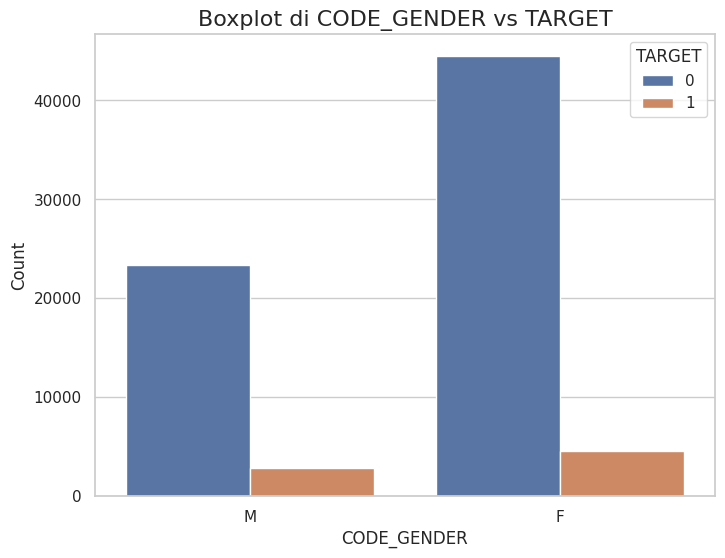

In [ ]:
chi2_test("CODE_GENDER", df)

p-value: 1.6862499428774853e-39


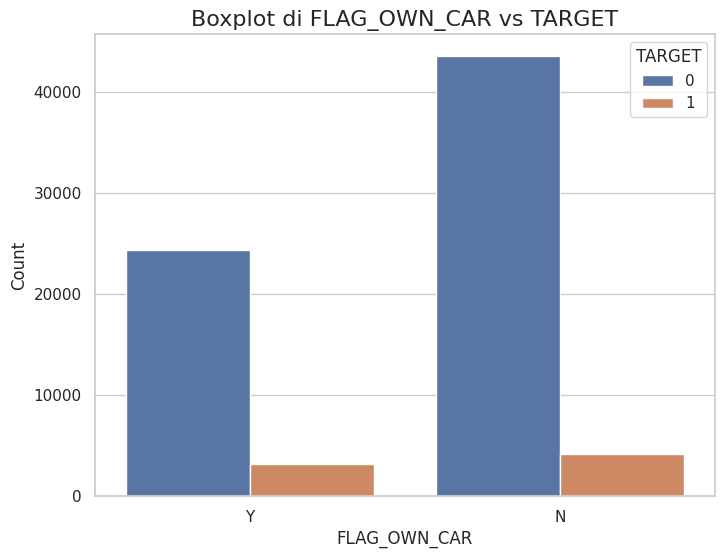

In [ ]:
chi2_test("FLAG_OWN_CAR", df)

p-value: 6.383637087801857e-19


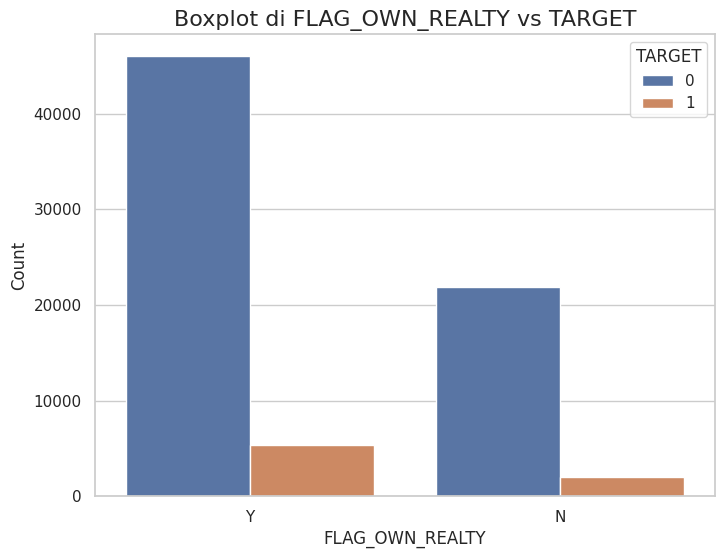

In [ ]:
chi2_test("FLAG_OWN_REALTY", df)

p-value: 0.0


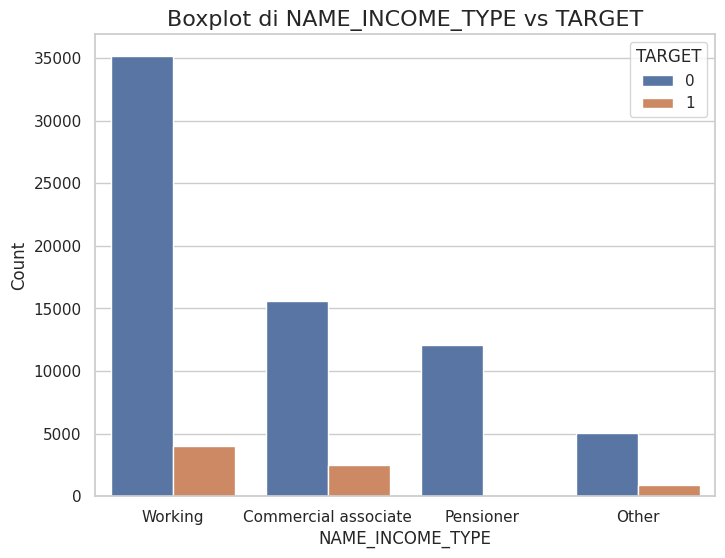

In [ ]:
chi2_test("NAME_INCOME_TYPE", df)

p-value: 5.703651248291785e-35


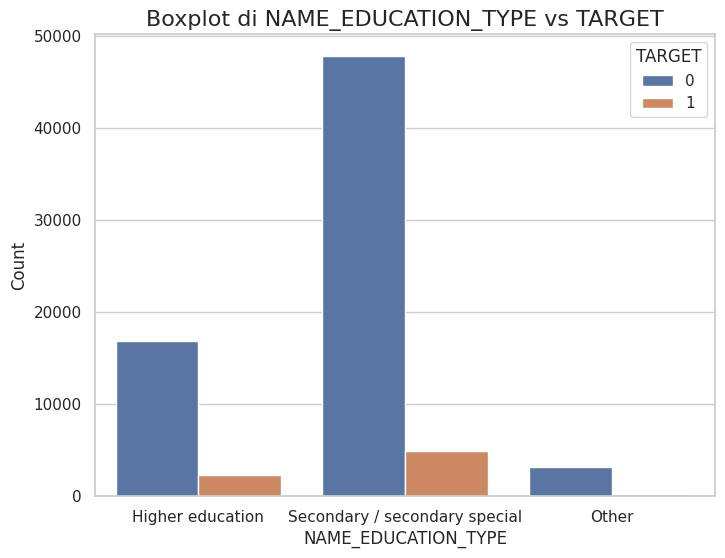

In [ ]:
chi2_test("NAME_EDUCATION_TYPE", df)

p-value: 3.619626864444522e-15


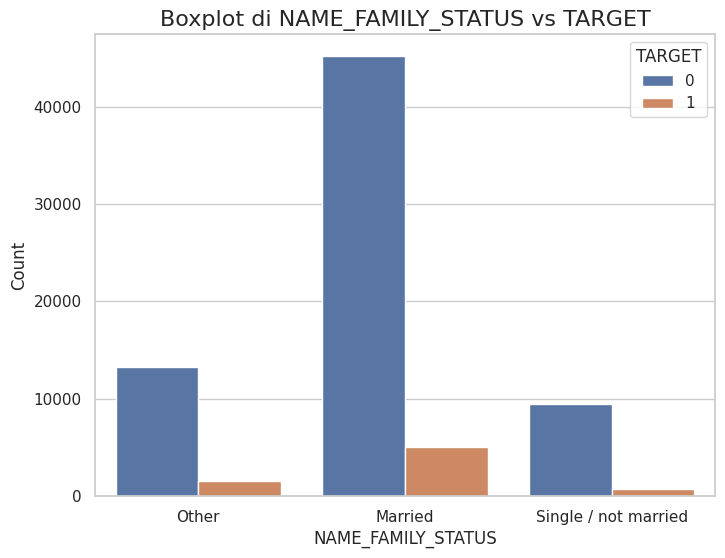

In [ ]:
chi2_test("NAME_FAMILY_STATUS", df)

p-value: 2.6555362053821538e-21


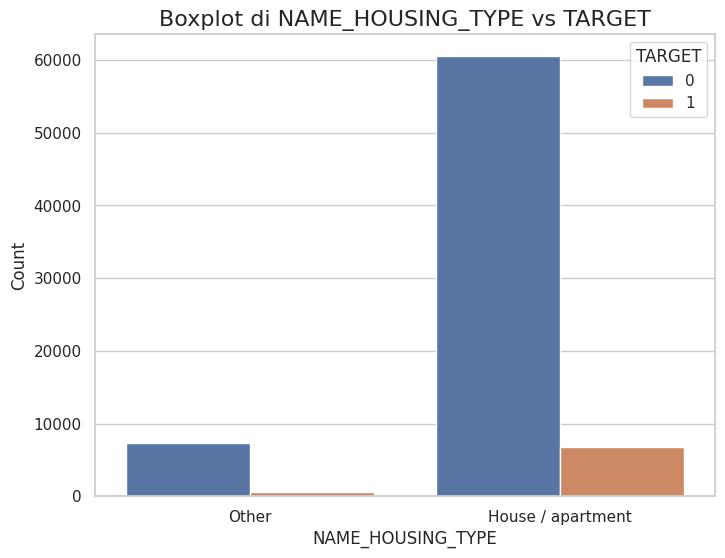

In [ ]:
chi2_test("NAME_HOUSING_TYPE", df)

p-value: 1.0474218685054425e-133


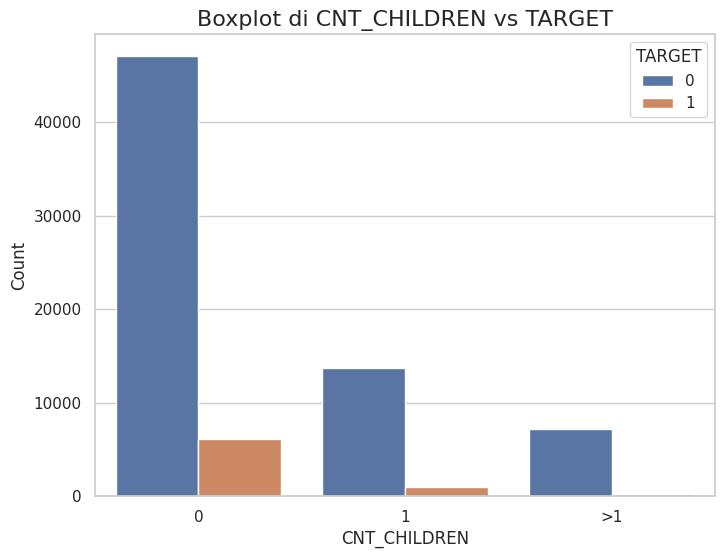

In [ ]:
chi2_test("CNT_CHILDREN", df)

p-value: 1.749344483317623e-126


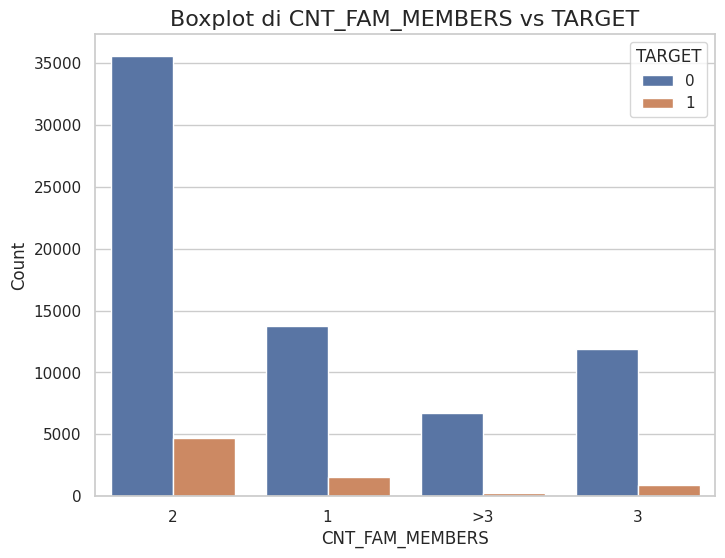

In [ ]:
chi2_test("CNT_FAM_MEMBERS", df)

p-value: 6.888074365891977e-06


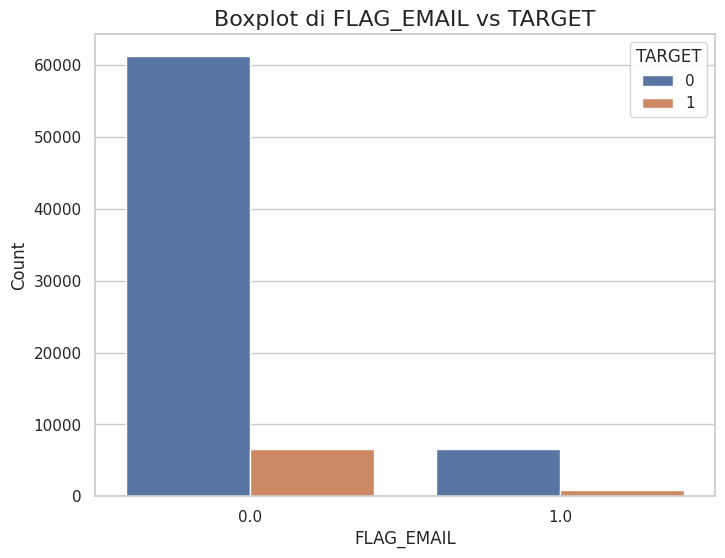

In [ ]:
chi2_test("FLAG_EMAIL", df)

p-value: 6.206905918647366e-07


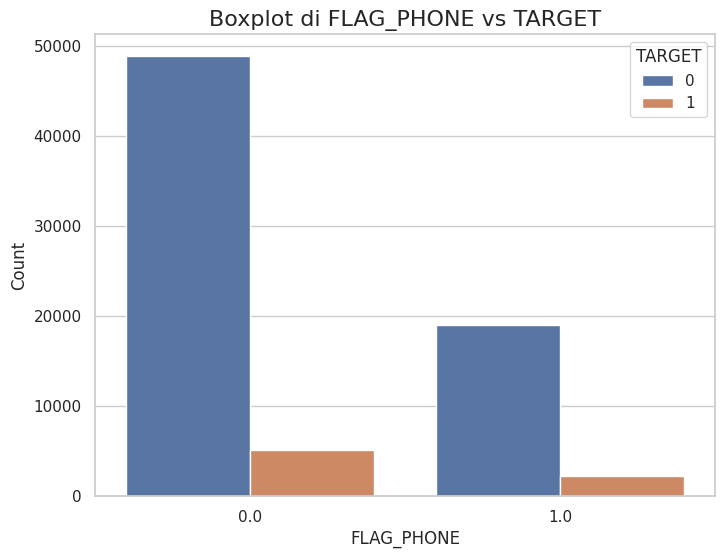

In [ ]:
chi2_test("FLAG_PHONE", df)

p-value: 0.0027609055717468904


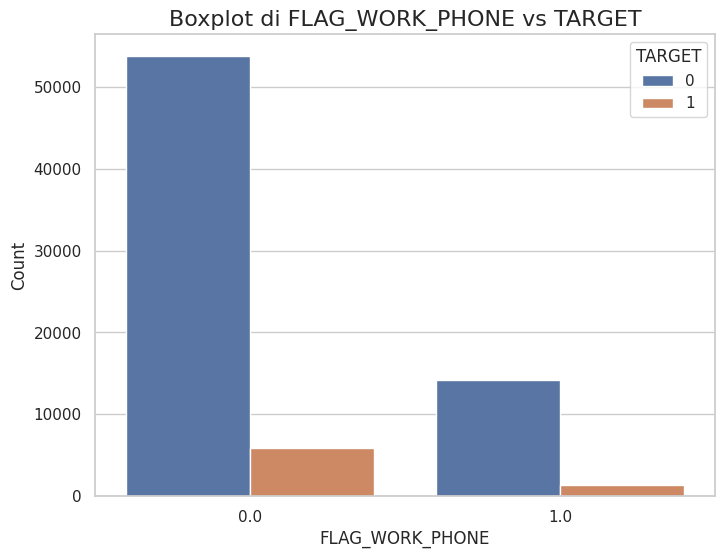

In [ ]:
chi2_test("FLAG_WORK_PHONE", df)

Il test del Chi-quadro applicato a tutte le variabili categoriche rispetto al target ha restituito un p-value molto basso per ciascuna di esse. Questo risultato indica che esiste una relazione statisticamente significativa tra il target e ciascuna di queste variabili. In altre parole, la distribuzione del target non è indipendente dalle categorie di queste variabili, suggerendo che potrebbero avere un certo potenziale informativo per il modello predittivo

#Variabili continue vs TARGET

In [ ]:
def boxplot_target(column, data, title=None, xlabel=None):
  plt.figure(figsize=(8,6))
  sns.set_theme(style="whitegrid")
  sns.boxplot(x="TARGET", y=column, data=data)

  if title is None:
    title= f"Boxplot di {column} vs TARGET"
  if xlabel is None:
    xlabel=column

  plt.title(title, fontsize=16)
  plt.xlabel(xlabel)
  plt.ylabel

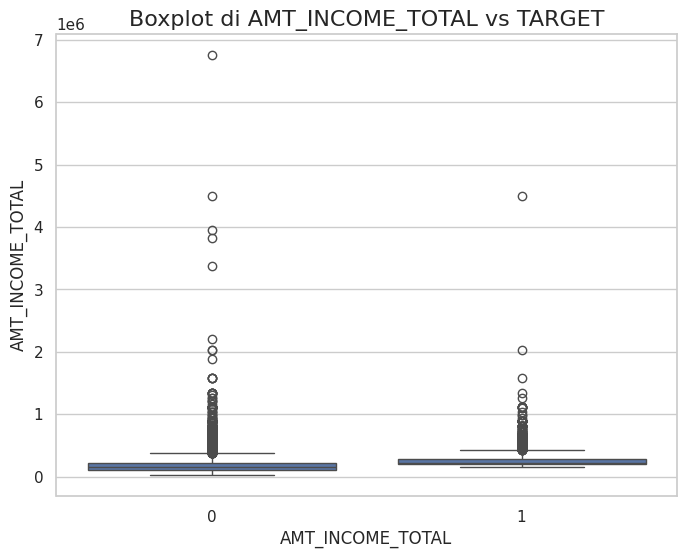

In [ ]:
boxplot_target("AMT_INCOME_TOTAL", df)

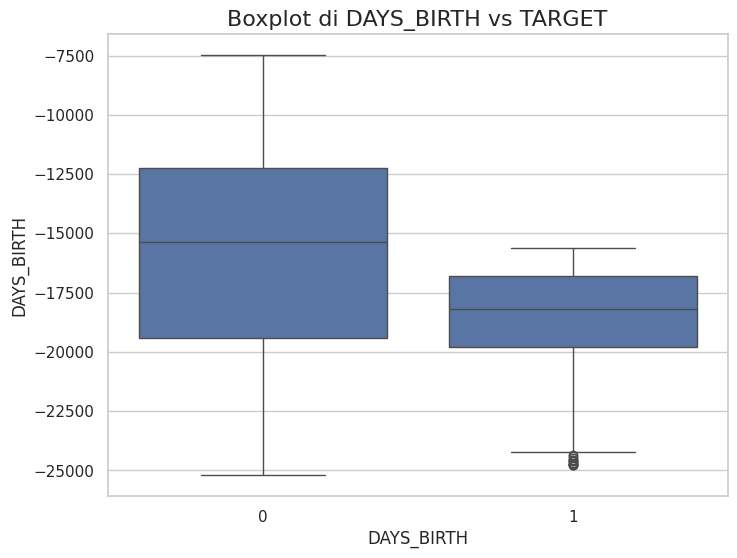

In [ ]:
boxplot_target("DAYS_BIRTH", df)

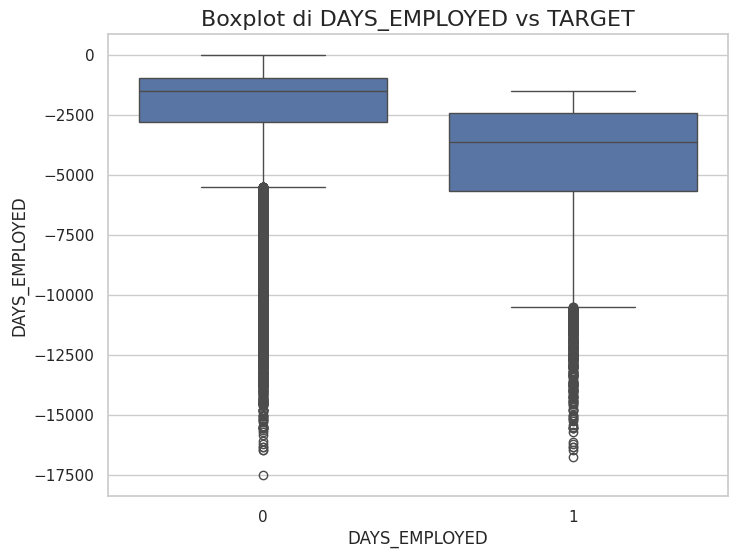

In [ ]:
boxplot_target("DAYS_EMPLOYED", df)

L'analisi delle variabili continue confrontate con il target, rappresentata tramite boxplot, ha evidenziato che le medie delle variabili tendono a differire tra le due classi del target. Questa differenza nelle medie suggerisce che esiste una potenziale relazione tra queste variabili e il target, il che potrebbe indicare che le variabili hanno una certa capacità predittiva rispetto al target.

#Matrice di Correllazione tra variabili continue

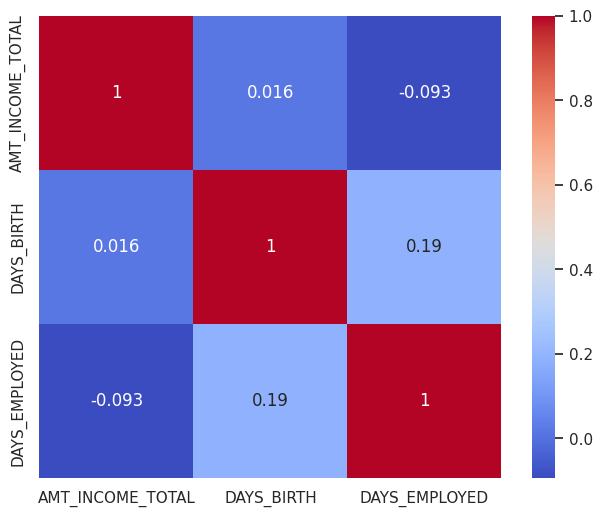

In [ ]:
cols = ["AMT_INCOME_TOTAL", "DAYS_BIRTH", "DAYS_EMPLOYED"]

plt.figure(figsize=(8,6))

hm = sns.heatmap(
    df[cols].corr(),
    annot=True,
    cbar=True,
    square=True,
    yticklabels=df[cols].columns,
    xticklabels=df[cols].columns,
    annot_kws={"size":12},
    cmap="coolwarm")

plt.show()

Dato che tutte le correlazioni sono molto basse, nessuna delle variabili presenta una relazione lineare forte con le altre. Questo suggerisce che ciascuna variabile può contribuire informazioni uniche al modello e non vi è rischio di multicollinearità significativa.

#Features Encoding

###Label Encoder per variabili binarie

In [ ]:
df.shape

(75257, 17)

In [ ]:
cols = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY"]

for col in cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
0,1,1,1,0,427500.0,Working,Higher education,Other,Other,-12005.0,-4542.0,1.0,0.0,0.0,Retirees,2,0
2,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,0.0,0.0,0.0,Other,2,0
3,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,0.0,1.0,1.0,Other,1,1
7,0,0,1,0,283500.0,Pensioner,Higher education,Other,House / apartment,-22464.0,-1493.0,0.0,0.0,0.0,Retirees,1,0
10,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,-16872.0,-769.0,1.0,1.0,1.0,Other,2,0


###OneHotEncoder per variabili discrete non ordinali

In [ ]:
cols = ["NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "CNT_CHILDREN", "CNT_FAM_MEMBERS", "OCCUPATION_TYPE"]
ohe = OneHotEncoder(drop="first")
encoded = ohe.fit_transform(df[cols])
encoded_df = pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out(cols))
encoded_df.shape

(75257, 15)

In [ ]:
df = df.drop(columns=cols).reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

df = pd.concat([df, encoded_df], axis=1)
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,TARGET,...,NAME_FAMILY_STATUS_Other,NAME_FAMILY_STATUS_Single / not married,NAME_HOUSING_TYPE_Other,CNT_CHILDREN_1,CNT_CHILDREN_>1,CNT_FAM_MEMBERS_2,CNT_FAM_MEMBERS_3,CNT_FAM_MEMBERS_>3,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Retirees
0,1,1,1,427500.0,-12005.0,-4542.0,1.0,0.0,0.0,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,1,112500.0,-21474.0,-1134.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,0,1,270000.0,-19110.0,-3051.0,0.0,1.0,1.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,1,283500.0,-22464.0,-1493.0,0.0,0.0,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,1,270000.0,-16872.0,-769.0,1.0,1.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#Creiamo il modello

In [ ]:
RANDOM_SEED = 0
X = df.drop("TARGET", axis=1).values
y = df["TARGET"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED, stratify=y)
print(f"Dimensione X_train: {X_train.shape}")
print(f"Dimensione X_test: {X_train.shape}")
print(f"Dimensione y_train: {y_train.shape}")
print(f"Dimensione y_test: {y_test.shape}")

Dimensione X_train: (52679, 24)
Dimensione X_test: (52679, 24)
Dimensione y_train: (52679,)
Dimensione y_test: (22578,)


In [ ]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

#Logistic Regression

In [ ]:
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     47520
           1       0.31      0.88      0.46      5159

    accuracy                           0.80     52679
   macro avg       0.65      0.83      0.67     52679
weighted avg       0.92      0.80      0.83     52679

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     20367
           1       0.31      0.89      0.46      2211

    accuracy                           0.79     22578
   macro avg       0.65      0.84      0.66     22578
weighted avg       0.92      0.79      0.83     22578



In [ ]:
y_proba_train = lr.predict_proba(X_train)
y_proba_test = lr.predict_proba(X_test)

In [ ]:
auc_score = roc_auc_score(y_train, y_proba_train[:,1])
auc_score

0.8957675445251769

In [ ]:
auc_score = roc_auc_score(y_test, y_proba_test[:,1])
auc_score

0.8946131454787909

In [ ]:
y_pred_train = np.where(y_proba_train[:,1]>0.75,1,0)
y_pred_test = np.where(y_proba_test[:,1]>0.75,1,0)

In [ ]:
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     47520
           1       0.38      0.53      0.44      5159

    accuracy                           0.87     52679
   macro avg       0.66      0.72      0.68     52679
weighted avg       0.89      0.87      0.88     52679

TEST REPORT
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     20367
           1       0.37      0.55      0.44      2211

    accuracy                           0.87     22578
   macro avg       0.66      0.72      0.68     22578
weighted avg       0.89      0.87      0.88     22578



#Oversampling

In [ ]:
RANDOM_SEED = 0
X = df.drop("TARGET", axis=1).values
y = df["TARGET"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED, stratify=y)
print(f"Dimensione X_train: {X_train.shape}")
print(f"Dimensione X_test: {X_train.shape}")
print(f"Dimensione y_train: {y_train.shape}")
print(f"Dimensione y_test: {y_test.shape}")

Dimensione X_train: (52679, 24)
Dimensione X_test: (52679, 24)
Dimensione y_train: (52679,)
Dimensione y_test: (22578,)


In [ ]:
from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
mms = MinMaxScaler()
X_train_resampled = mms.fit_transform(X_train_resampled)
X_test = mms.transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
y_pred_train = lr.predict(X_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred_train = lr.predict(X_train_resampled)
y_pred_test = lr.predict(X_test)

print("TRAIN REPORT")
print(classification_report(y_train_resampled, y_pred_train))
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     47520
           1       0.81      0.88      0.84     47520

    accuracy                           0.84     95040
   macro avg       0.84      0.84      0.83     95040
weighted avg       0.84      0.84      0.83     95040

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     20367
           1       0.31      0.89      0.46      2211

    accuracy                           0.80     22578
   macro avg       0.65      0.84      0.67     22578
weighted avg       0.92      0.80      0.83     22578



#Undersampling

In [ ]:
RANDOM_SEED = 0
X = df.drop("TARGET", axis=1).values
y = df["TARGET"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED, stratify=y)
print(f"Dimensione X_train: {X_train.shape}")
print(f"Dimensione X_test: {X_train.shape}")
print(f"Dimensione y_train: {y_train.shape}")
print(f"Dimensione y_test: {y_test.shape}")

Dimensione X_train: (52679, 24)
Dimensione X_test: (52679, 24)
Dimensione y_train: (52679,)
Dimensione y_test: (22578,)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
mms = MinMaxScaler()
X_train_resampled = mms.fit_transform(X_train_resampled)
X_test = mms.transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
y_pred_train = lr.predict(X_train_resampled)

In [ ]:
y_pred_train = lr.predict(X_train_resampled)
y_pred_test = lr.predict(X_test)

print("TRAIN REPORT")
print(classification_report(y_train_resampled, y_pred_train))
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      5159
           1       0.81      0.88      0.84      5159

    accuracy                           0.84     10318
   macro avg       0.84      0.84      0.84     10318
weighted avg       0.84      0.84      0.84     10318

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.77      0.87     20367
           1       0.30      0.89      0.45      2211

    accuracy                           0.79     22578
   macro avg       0.64      0.83      0.66     22578
weighted avg       0.92      0.79      0.83     22578



È stato scelto di utilizzare la regressione logistica per affrontare il problema, prestando particolare attenzione allo sbilanciamento delle classi. Sono stati applicati diversi approcci per gestire questo sbilanciamento, tra cui l'uso della regressione logistica sui dati originali, con una riduzione della classe maggioritaria (Undersampling) e con un incremento della classe minoritaria (Oversampling). Tuttavia, nonostante questi tentativi, nessuno dei tre approcci ha prodotto i risultati sperati.

#Creiamo il modello

In [ ]:
RANDOM_SEED = 0
X = df.drop("TARGET", axis=1).values
y = df["TARGET"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED, stratify=y)
print(f"Dimensione X_train: {X_train.shape}")
print(f"Dimensione X_test: {X_test.shape}")
print(f"Dimensione y_train: {y_train.shape}")
print(f"Dimensione y_test: {y_test.shape}")

Dimensione X_train: (52679, 24)
Dimensione X_test: (22578, 24)
Dimensione y_train: (52679,)
Dimensione y_test: (22578,)


#Bernoulli Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_proba = gnb.predict_proba(X_test)
log_loss(y_test, y_proba)

0.32785017155982893

In [ ]:
print(classification_report(y_test, gnb.predict(X_test)))
print(classification_report(y_train, gnb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     20367
           1       0.37      0.27      0.31      2211

    accuracy                           0.88     22578
   macro avg       0.65      0.61      0.62     22578
weighted avg       0.87      0.88      0.88     22578

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     47520
           1       0.37      0.27      0.31      5159

    accuracy                           0.88     52679
   macro avg       0.65      0.61      0.62     52679
weighted avg       0.87      0.88      0.88     52679



Tra tutti i modelli Naive Bayes disponibili, è stato scelto di utilizzare il modello Gaussian Naive Bayes perché ha prodotto i risultati migliori rispetto ad altre varianti. Tuttavia, nonostante le prestazioni relativamente superiori, i risultati ottenuti non sono ancora soddisfacenti. Questo suggerisce che, pur essendo Gaussian Naive Bayes il modello Naive Bayes più adatto ai dati attuali, potrebbe non essere l'approccio ideale per risolvere il problema.

#Creiamo il modello

In [ ]:
RANDOM_SEED = 0
X = df.drop("TARGET", axis=1).values
y = df["TARGET"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED, stratify=y)
print(f"Dimensione X_train: {X_train.shape}")
print(f"Dimensione X_test: {X_train.shape}")
print(f"Dimensione y_train: {y_train.shape}")
print(f"Dimensione y_test: {y_test.shape}")

Dimensione X_train: (52679, 24)
Dimensione X_test: (52679, 24)
Dimensione y_train: (52679,)
Dimensione y_test: (22578,)


#Decision Tree

In [ ]:
tree = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=25,
    min_samples_leaf=10,
    max_features=5,
    max_leaf_nodes=25,
    random_state=0)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=5, max_leaf_nodes=25,
                       min_samples_leaf=10, min_samples_split=25,
                       random_state=0)

In [ ]:
print(classification_report(y_train, tree.predict(X_train)))
print(classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     47520
           1       0.59      0.03      0.06      5159

    accuracy                           0.90     52679
   macro avg       0.75      0.51      0.50     52679
weighted avg       0.87      0.90      0.86     52679

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     20367
           1       0.48      0.02      0.05      2211

    accuracy                           0.90     22578
   macro avg       0.69      0.51      0.50     22578
weighted avg       0.86      0.90      0.86     22578



Anche per il modello di Decision Tree, dopo aver testato diverse combinazioni di parametri e aver ottimizzato il modello per migliorare la generalizzazione, la soluzione attuale si è rivelata essere la migliore possibile tra quelle provate. Tuttavia, i risultati ottenuti non sono ancora soddisfacenti.

#Creiamo il modello

In [ ]:
RANDOM_SEED = 0
X = df.drop("TARGET", axis=1).values
y = df["TARGET"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED, stratify=y)
print(f"Dimensione X_train: {X_train.shape}")
print(f"Dimensione X_test: {X_train.shape}")
print(f"Dimensione y_train: {y_train.shape}")
print(f"Dimensione y_test: {y_test.shape}")

Dimensione X_train: (52679, 24)
Dimensione X_test: (52679, 24)
Dimensione y_train: (52679,)
Dimensione y_test: (22578,)


#Random Forest

In [ ]:
rfr = RandomForestClassifier(n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    max_samples=0.8,
    class_weight="balanced",
    random_state=RANDOM_SEED )
rfr.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9018513597307113

In [ ]:
print(classification_report(y_train, rfr.predict(X_train)))
print(classification_report(y_test, rfr.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     47520
           1       0.56      1.00      0.72      5159

    accuracy                           0.92     52679
   macro avg       0.78      0.96      0.84     52679
weighted avg       0.96      0.92      0.93     52679

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     20367
           1       0.56      1.00      0.71      2211

    accuracy                           0.92     22578
   macro avg       0.78      0.95      0.83     22578
weighted avg       0.96      0.92      0.93     22578



I risultati attuali ottenuti con la configurazione ottimizzata della Random Forest mostrano un'accuracy complessiva di 0.92 sia sul set di addestramento che su quello di test, indicando una buona capacità di generalizzazione del modello.

Per quanto riguarda la classe 0, sia la precision che la recall sono molto elevate in entrambi i set di dati. Questo indica che il modello riesce a identificare accuratamente la classe maggioritaria (0) senza molti errori.

Invece, per la classe positiva (1), i risultati sono: la recall è eccellente, pari a 1.0 sia nel train che nel test, il che significa che il modello riesce a identificare correttamente tutte le istanze della classe 1. Tuttavia, la precision per la classe 1 è bassa, attorno a 0.56 in entrambi i set, il che indica un alto numero di falsi positivi per questa classe. In altre parole, quando il modello predice la classe 1, la previsione è corretta solo nel 56% dei casi, suggerendo che potrebbe esserci una tendenza a classificare erroneamente la classe 0 come classe 1.

#Confusion Matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"]):

    cm = confusion_matrix(y_true, y_pred)

    df_cm = pd.DataFrame(cm,
                         index=labels,
                         columns=["Predicted "+ labels[0], "Predicted "+labels[1]])
    sns.heatmap(df_cm, annot=True, fmt='g')


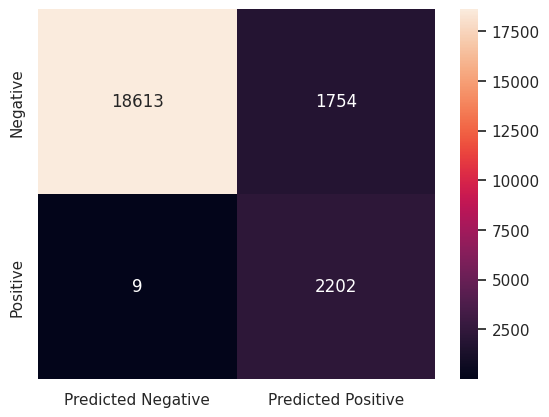

In [ ]:
plot_confusion_matrix(y_test, rfr.predict(X_test))